## Aviation Accident Database & Synopses, up to 2023

### Introduction.

#### **Business understanding**
A company is embarking on a strategic expansion into the  aviation sector, aiming to diversify its investment portfolio by purchasing and  operating planes for both commercial and private enterprises. As this venture is new to the organisation, there is limited internal knowledge about the aviation domain, particularly regarding safety and operational risk.


#### **Business problem**
The company must identify which aircraft models  and types have  the lowest operational risk to guide safe and cost-effective entry into the aviation market.



#### **EDA objectives**
This notebook explores aircraft risk patterns to support the Company's on safe aircraft acquisition decisions. The following objectives are structured around key EDA phases:

1. **Data understanding**
     * Load and preview the dataset to understand its structure, size and key variables.
     * Identify the most relevant columns for analyzing aviation safety.

2. **Data cleaning**
     * Handle missing values  and  duplicated values.
     * Check on inconsistent formatting in the key fields.
     * Standardize categorical variables for accurate grouping.
     * Check on outliers.......
    
3. **Univariate & Bivariate Analysis**
     * Explore the most common aircraft types and count how many incidents each has.
     * Analyze incident trends over time to detect rising or declining risk patterns
    
4. **Multivariate & Grouped Insights**
     * Compare incident frequencies by usage type (commercial vs private), age, or manufacturer.
    
5. **Incident Causes & Locations**
     * Visualize the  top causes of incidents and the regions with the highest incident density. 
     
   


##### 1. **Data Understanding**
* **Import the necessary libraries required for the data.**
* **Load the `Aviation.csv` data**

In [1]:
# import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the data.
df= pd.read_csv('AviationData.csv', encoding = 'latin1', low_memory = False)

In [5]:
# Check the size of the data
df.shape

(88889, 31)

In [7]:
# check the columns of the data
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [9]:
# check the whole iformation  of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [11]:
# check the first five rows 
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [13]:
# check the last 5 rows
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [15]:
# check the statistical summary of the data
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


 For the column to be relevant to the analysis, it should  answer the questions:
* Which? Answer types of aircraft or models.
* Why? Answers what caused the incident
* When?  Answer the time trend
* What kind of incident happened? Answer types of incidents and which one of them is sever
 

##### 2. **Data cleaning**
* Handle missing values  and  duplicated values.
* Check on inconsistent formatting in the key fields.
* Standardize categorical variables for accurate grouping.
* Check on outliers.......

In [19]:
# check on duplicated values 
df.duplicated().any()

False

In [21]:
# Check out the columns with  missing values
df.isnull().any()

Event.Id                  False
Investigation.Type        False
Accident.Number           False
Event.Date                False
Location                   True
Country                    True
Latitude                   True
Longitude                  True
Airport.Code               True
Airport.Name               True
Injury.Severity            True
Aircraft.damage            True
Aircraft.Category          True
Registration.Number        True
Make                       True
Model                      True
Amateur.Built              True
Number.of.Engines          True
Engine.Type                True
FAR.Description            True
Schedule                   True
Purpose.of.flight          True
Air.carrier                True
Total.Fatal.Injuries       True
Total.Serious.Injuries     True
Total.Minor.Injuries       True
Total.Uninjured            True
Weather.Condition          True
Broad.phase.of.flight      True
Report.Status              True
Publication.Date           True
dtype: b

In [23]:
# check the columns missing values with their percentages 
df.isnull().mean().sort_values(ascending=False).round(2) * 100

Schedule                  86.0
Air.carrier               81.0
FAR.Description           64.0
Aircraft.Category         64.0
Longitude                 61.0
Latitude                  61.0
Airport.Code              44.0
Airport.Name              41.0
Broad.phase.of.flight     31.0
Publication.Date          15.0
Total.Serious.Injuries    14.0
Total.Minor.Injuries      13.0
Total.Fatal.Injuries      13.0
Engine.Type                8.0
Report.Status              7.0
Purpose.of.flight          7.0
Number.of.Engines          7.0
Total.Uninjured            7.0
Weather.Condition          5.0
Aircraft.damage            4.0
Registration.Number        2.0
Injury.Severity            1.0
Country                    0.0
Amateur.Built              0.0
Model                      0.0
Make                       0.0
Location                   0.0
Investigation.Type         0.0
Event.Date                 0.0
Accident.Number            0.0
Event.Id                   0.0
dtype: float64

In [25]:
#  Drop the unnecessary  columns, I mean according to the analysis
df.drop(['Schedule','Airport.Code', 'Registration.Number'],axis=1, inplace= True)

In [27]:
# Replace columns with unknown values.
# This is to avoid  biased data.
df['Air.carrier'] = df['Air.carrier'].fillna('Unknown Operator')
df['FAR.Description'] = df['FAR.Description'].fillna('Unknown FAR Category')
df['Aircraft.Category'] = df['Aircraft.Category'].fillna('Unknown Category')
df['Airport.Name']= df['Airport.Name'].fillna('Unknown Airport')
df['Broad.phase.of.flight']=df['Broad.phase.of.flight'].fillna('Unknown Phase')

In [29]:
#  check for the remaining columns with missing values .
df.isnull().sum().sort_values(ascending=False)

Longitude                 54516
Latitude                  54507
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Investigation.Type            0
FAR.Description               0
Air.carrier                   0
Aircraft.Category             0
Airport.Name                  0
Event.Date                    0
Broad.phase.of.flight         0
Accident.Number               0
Event.Id                      0
dtype: int64

In [31]:
#   lets check the mean and median of this columns
cols_int = [
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Fatal.Injuries',
    'Total.Uninjured',
    'Number.of.Engines'
]

# Check mean for all at once
df[cols_int].mean()

# check medians for the columns
df[cols_int].median()


Total.Serious.Injuries    0.0
Total.Minor.Injuries      0.0
Total.Fatal.Injuries      0.0
Total.Uninjured           1.0
Number.of.Engines         1.0
dtype: float64

So, according to the data above we cannot fill the missing values of the injured columns with  the mean and median but we can fill them with `0`

In [34]:
# fill the missing values of the injured cols with 0
injury_cols = ['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Fatal.Injuries', 'Total.Uninjured']
df[injury_cols] = df[injury_cols].fillna(0)

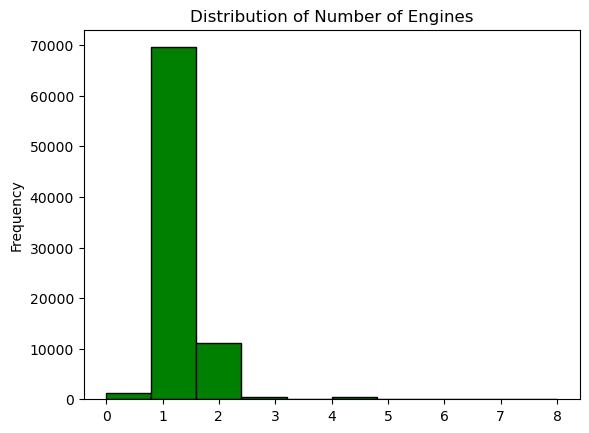

In [36]:
#  lets look into the number.of. Engines col using a visual to checkif the data is skewed.
import matplotlib.pyplot as plt

df['Number.of.Engines'].dropna().plot(kind='hist', bins=10, color='green', ec= 'black')
plt.title("Distribution of Number of Engines")
plt.show()


In [38]:
# fill the data  with median
df['Number.of.Engines']= df['Number.of.Engines'].fillna(df['Number.of.Engines'].median())

In [40]:
#  check for the remaining columns with missing values .
df.isnull().sum().sort_values(ascending=False)

Longitude                 54516
Latitude                  54507
Publication.Date          13771
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Weather.Condition          4492
Aircraft.damage            3194
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Aircraft.Category             0
Total.Serious.Injuries        0
Accident.Number               0
Broad.phase.of.flight         0
Event.Date                    0
Total.Uninjured               0
Total.Minor.Injuries          0
Air.carrier                   0
Total.Fatal.Injuries          0
FAR.Description               0
Airport.Name                  0
Number.of.Engines             0
Investigation.Type            0
Event.Id                      0
dtype: int64

In [42]:
# ckeck the injury.severity col
df[df['Injury.Severity'].isnull()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
63918,20080111X00038,Incident,DCA08WA024,2008-01-03,"Deauville Saint, France",France,482148N,0000922E,Unknown Airport,NaN,...,NaN,Royal Air Maroc,0.0,0.0,0.0,0.0,NaN,Unknown Phase,NaN,25-09-2020
63962,20080204X00132,Accident,NYC08WA081,2008-01-16,"Kiteni, Peru",Peru,121128S,0073010W,Unknown Airport,NaN,...,NaN,Aviation del Sur S.A.,0.0,0.0,0.0,0.0,NaN,Unknown Phase,NaN,25-09-2020
63987,20080304X00254,Incident,ENG08RA015,2008-01-24,"Kingston, Jamaica",Jamaica,NaN,NaN,Unknown Airport,NaN,...,NaN,Rutair Limited,0.0,0.0,0.0,0.0,NaN,Unknown Phase,NaN,25-09-2020
64026,20081219X65255,Incident,ENG08WA014,2008-02-03,"Nurnberg, Germany",Germany,NaN,NaN,"Nurnberg, Germany",NaN,...,NaN,Unknown Operator,0.0,0.0,0.0,0.0,NaN,Unknown Phase,NaN,03-11-2020
64128,20080409X00444,Accident,NYC08WA121,2008-02-28,"Lago Ranco, Chile",Chile,040190S,0072130W,Unknown Airport,NaN,...,Personal,Rafael Canas,0.0,0.0,0.0,0.0,VMC,Unknown Phase,NaN,25-09-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88863,20221213106449,Accident,GAA22WA311,2022-12-11,"Kildare,",Ireland,NaN,NaN,Unknown Airport,NaN,...,NaN,SOUTHERN AIRCRAFT CONSULTANCY INC TRUSTEE,0.0,0.0,0.0,0.0,NaN,Unknown Phase,NaN,NaN
88874,20221215106462,Accident,CEN23LA064,2022-12-15,"Patterson, LA",United States,NaN,NaN,Unknown Airport,NaN,...,NaN,ROTORCRAFT LEASING CO LLC,0.0,0.0,0.0,0.0,NaN,Unknown Phase,NaN,NaN
88879,20221219106472,Accident,DCA23LA096,2022-12-18,"Kahului, HI",United States,NaN,NaN,Unknown Airport,NaN,...,NaN,HAWAIIAN AIRLINES INC,0.0,0.0,0.0,0.0,NaN,Unknown Phase,NaN,NaN
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,Unknown Airport,NaN,...,NaN,Unknown Operator,0.0,0.0,0.0,0.0,NaN,Unknown Phase,NaN,NaN


In [44]:
# We can fill up this column with the injury columns .

def refer_severity(row):
    if row['Total.Fatal.Injuries'] > 0:
        return 'Fatal'
    elif row['Total.Serious.Injuries'] > 0:
        return 'Serious'
    elif row['Total.Minor.Injuries'] > 0:
        return 'Minor'
    elif row['Total.Uninjured'] > 0:
        return 'None'
    else:
        return 'Unknown'

df['Injury.Severity'] = df.apply(refer_severity, axis=1)

In [45]:
df['Injury.Severity'].value_counts()

Injury.Severity
None       47089
Fatal      17813
Minor      11488
Serious    11190
Unknown     1309
Name: count, dtype: int64

In [48]:
# check the  country and location 
df[df['Country'].isnull()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
36,20020917X02410,Accident,MIA82FKA05,1982-01-04,SAINT CROIX,NaN,NaN,NaN,ALEXANDER HAMILTON,Fatal,...,Business,Unknown Operator,1.0,0.0,1.0,0.0,VMC,Taxi,Probable Cause,04-01-1983
464,20020917X02358,Accident,MIA82DA062,1982-03-02,HUMA CAO,NaN,NaN,NaN,Unknown Airport,Fatal,...,Personal,Unknown Operator,1.0,0.0,0.0,0.0,VMC,Descent,Probable Cause,02-03-1983
465,20020917X02026,Accident,FTW82DA076,1982-03-02,MUSTANG BLK A11,NaN,NaN,NaN,Unknown Airport,Serious,...,Unknown,Unknown Operator,0.0,1.0,0.0,5.0,VMC,Standing,Probable Cause,02-03-1983
725,20020917X02377,Accident,MIA82DA091,1982-03-31,MOCA,NaN,NaN,NaN,LABADIE,None,...,Unknown,Unknown Operator,0.0,0.0,0.0,1.0,UNK,Landing,Probable Cause,31-03-1983
831,20020917X02069,Accident,FTW82DA127,1982-04-13,WEST DELTA 105D,NaN,NaN,NaN,Unknown Airport,Minor,...,Ferry,Unknown Operator,0.0,0.0,1.0,0.0,VMC,Takeoff,Probable Cause,13-04-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52288,20020322X00387,Accident,DCA02MA029,2002-03-22,int'l waters,NaN,NaN,NaN,Unknown Airport,Serious,...,NaN,Northwest Airlines,0.0,1.0,4.0,257.0,VMC,Descent,Probable Cause,18-05-2004
54284,20040528X00699,Accident,DCA03WA031,2003-03-12,JOHANNESBURG,NaN,NaN,NaN,Unknown Airport,Unknown,...,NaN,Unknown Operator,0.0,0.0,0.0,0.0,NaN,Unknown Phase,Foreign,28-05-2004
56200,20040528X00697,Accident,DCA04WA026,2004-02-10,Sharjah Airport,NaN,NaN,NaN,Unknown Airport,Fatal,...,NaN,Unknown Operator,46.0,3.0,0.0,0.0,NaN,Unknown Phase,Foreign,28-05-2004
58803,20050616X00790,Incident,DCA05WA073,2005-06-10,Canada/US borde,NaN,NaN,NaN,Unknown Airport,Unknown,...,NaN,Unknown Operator,0.0,0.0,0.0,0.0,NaN,Unknown Phase,Foreign,21-06-2005


In [50]:
# check on the  remaining cols with missing values.
df.isnull().sum().sort_values(ascending=False)

Longitude                 54516
Latitude                  54507
Publication.Date          13771
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Weather.Condition          4492
Aircraft.damage            3194
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Injury.Severity               0
Total.Serious.Injuries        0
Accident.Number               0
Broad.phase.of.flight         0
Event.Date                    0
Total.Uninjured               0
Total.Minor.Injuries          0
Air.carrier                   0
Total.Fatal.Injuries          0
Aircraft.Category             0
FAR.Description               0
Airport.Name                  0
Number.of.Engines             0
Investigation.Type            0
Event.Id                      0
dtype: int64

In [52]:
#Fill the remaining columns with unknowns.
# To prevent data irrelevance or bias.
rem_cols=['Engine.Type','Report.Status','Purpose.of.flight','Weather.Condition','Aircraft.damage',            
          'Country','Amateur.Built','Model','Make','Location']
df[rem_cols]= df[rem_cols].fillna('Unknown')

In [54]:
# check on the  remaining cols with missing values.
df.isnull().sum().sort_values(ascending=False)

Longitude                 54516
Latitude                  54507
Publication.Date          13771
Number.of.Engines             0
Report.Status                 0
Broad.phase.of.flight         0
Weather.Condition             0
Total.Uninjured               0
Total.Minor.Injuries          0
Total.Serious.Injuries        0
Total.Fatal.Injuries          0
Air.carrier                   0
Purpose.of.flight             0
FAR.Description               0
Engine.Type                   0
Event.Id                      0
Investigation.Type            0
Model                         0
Make                          0
Aircraft.Category             0
Aircraft.damage               0
Injury.Severity               0
Airport.Name                  0
Country                       0
Location                      0
Event.Date                    0
Accident.Number               0
Amateur.Built                 0
dtype: int64

In [56]:
#  lets clean the latitude and longitude columns for Tableau mappings 
#Ensure 'Latitude' and 'Longitude' are numeric
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

In [58]:
# Drop rows without coordinates needed for mapping
df = df.dropna(subset=['Latitude', 'Longitude'])

In [60]:
# Start fresh with a clean copy if you filtered before
df = df.copy()

#apply your parsing safely
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], format='%d-%m-%Y', errors='coerce')


In [62]:
#create a display version that fills missing with 'Unknown'
df['PubDate_Display'] = df['Publication.Date'].dt.strftime('%Y-%m-%d')
df['PubDate_Display'] = df['PubDate_Display'].fillna('Unknown')

In [64]:
# counter check if the data is ready for use.
df.head(15)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Name,Injury.Severity,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,PubDate_Display
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Unknown Airport,Fatal,...,Unknown Operator,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2007-02-26,2007-02-26
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,Unknown Airport,Minor,...,Air Canada,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,2017-09-19,2017-09-19
593,20080417X00504,Accident,MIA08CA076,1982-03-16,"MOBILE, AL",United States,30.757778,-88.355555,MOBILE REGIONAL,Fatal,...,Unknown Operator,1.0,0.0,0.0,0.0,IMC,Landing,Probable Cause,2008-04-30,2008-04-30
3654,20051208X01953,Accident,SEA83LA209,1983-01-08,"Goldendale, WA",United States,46.041111,-120.849722,Unknown Airport,Fatal,...,Unknown Operator,2.0,0.0,0.0,0.0,VMC,Cruise,Probable Cause,2006-03-28,2006-03-28
6202,20020904X01525,Accident,SEA83FA208,1983-09-09,"Kalispell, MT",United States,48.120000,-113.887500,Unknown Airport,Fatal,...,Unknown Operator,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2003-07-23,2003-07-23
22096,20001213X27446,Accident,LAX89LA068,1988-12-23,"Midway Islands, PO",United States,38.540000,-173.240000,Unknown Airport,Serious,...,United Airlines,0.0,1.0,1.0,220.0,UNK,Cruise,Probable Cause,2016-02-02,2016-02-02
24567,20021022X05356,Accident,CHI90LA280,1989-12-01,"ENGADINE, MI",United States,46.154444,-85.663611,Unknown Airport,Fatal,...,Unknown Operator,1.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,2003-05-30,2003-05-30
26826,20030411X00484,Accident,ANC91GAMS1,1990-10-11,"Deadhorse, AK",United States,70.333333,-150.933333,Unknown Airport,Fatal,...,Unknown Operator,3.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,2003-05-30,2003-05-30
31353,20170710X10920,Accident,FTW92FA224,1992-09-05,"Alpine, TX",United States,30.383611,-103.783334,Unknown Airport,Fatal,...,Unknown Operator,1.0,1.0,0.0,0.0,VMC,Unknown,Probable Cause,2017-09-19,2017-09-19
38740,20011127X02295,Accident,NYC96FA192,1995-11-28,"Marlinton, WV",United States,38.335000,-80.280000,Braxton County,Fatal,...,Unknown Operator,1.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2003-01-16,2003-01-16


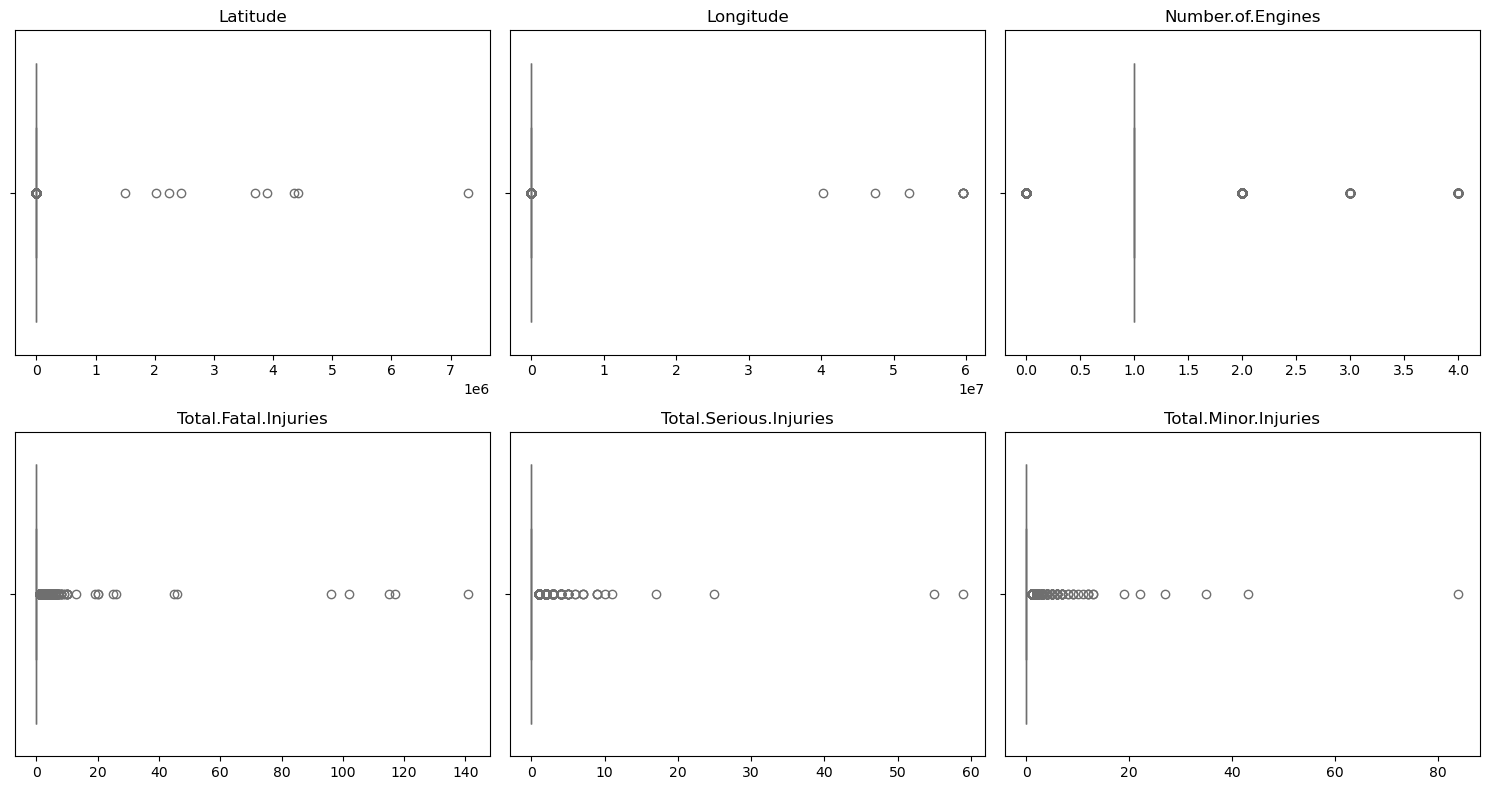

In [66]:
# check on outliers on the numeric columns
import seaborn as sns
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Set the number of rows and columns for the subplot grid
nrows = 2
ncols = 3

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))
axes = axes.flatten()  # Flatten  for easy indexing

# Plot each numeric column
for i, col in enumerate(numeric_cols[:nrows * ncols]):  # Limit to fit grid
    sns.boxplot(data=df, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##### 3. **Univariate & Bivariate Analysis**
* Explore the most common aircraft types and count how many incidents each has.
* Analyze incident trends over time to detect rising or declining risk patterns

In [69]:
# check the  aircraft type and count how many incidents each has 
df['Model'].value_counts().head()

Model
152          195
172N         175
172S         154
172          122
PA-28-140    117
Name: count, dtype: int64

In [71]:
# Analyze incident trends over time to detect rising or declining risk patterns
# Group the model data with the  event year column.
# Change the event date column to real-time dates 
df['Event.Date']=pd.to_datetime(df['Event.Date'], errors= 'coerce')

# extract the years from the `df['Event.Date']`
df['Event.Year']= df['Event.Date'].dt.year

In [73]:
grouped_df=df.groupby(['Event.Year','Model']).size().reset_index(name= 'incident_ttl')

In [75]:
top_models = df['Model'].value_counts().head().index
grouped_df = grouped_df[grouped_df['Model'].isin(top_models)]
grouped_df

,Event.Year,Model,incident_ttl
14,1999,152,2
27,2000,172,1
30,2000,172N,2
32,2000,172S,1
127,2000,PA-28-140,3
181,2001,152,28
185,2001,172,11
193,2001,172N,11
197,2001,172S,8
548,2001,PA-28-140,4


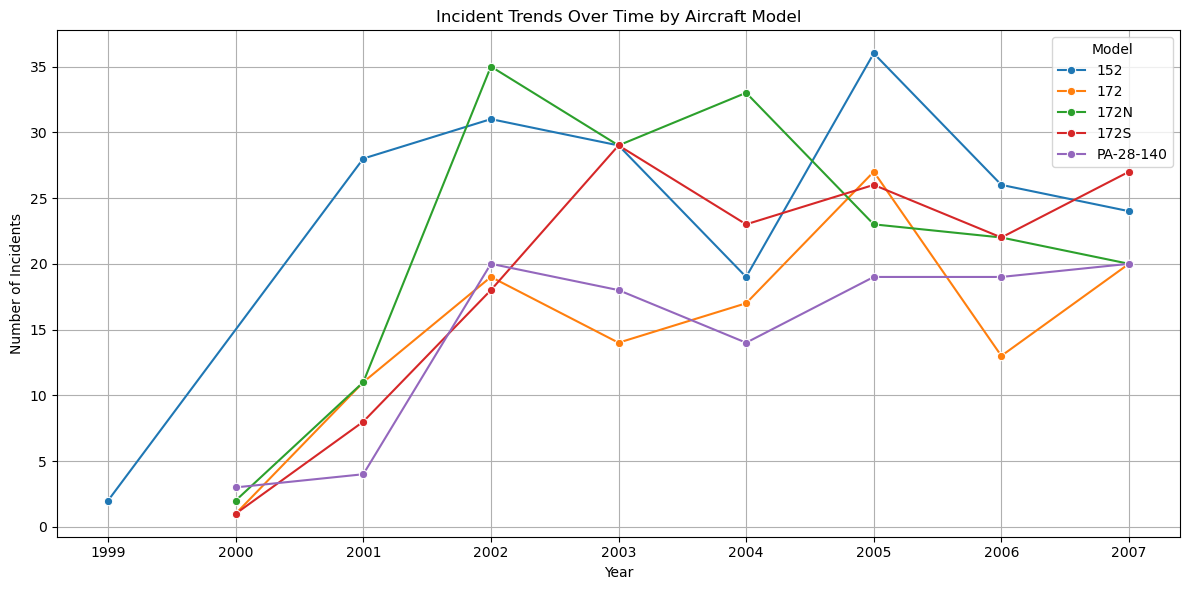

In [77]:
# plot the data  for better visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='Event.Year', y='incident_ttl', hue='Model', marker='o')
plt.title('Incident Trends Over Time by Aircraft Model')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()


In [79]:
grouped = df.groupby(['Event.Year', 'Model', 'Injury.Severity']).size().reset_index(name='Incident_ttl')
grouped

,Event.Year,Model,Injury.Severity,Incident_ttl
0,1974,172M,Fatal,1
1,1979,DC9,Minor,1
2,1982,C24R,Fatal,1
3,1983,14-19-3,Fatal,1
4,1983,182N,Fatal,1
...,...,...,...,...
8149,2021,T303,Fatal,1
8150,2021,U206,None,1
8151,2022,182,None,1
8152,2022,M-7-235B,None,1


In [81]:
# Change this grouped data to a pivot table to be able to plot a grouped bar format.
pivot_df = grouped.pivot_table(index=['Event.Year', 'Model'], 
                                 columns='Injury.Severity', 
                                 values='Incident_ttl', 
                                 fill_value=0).reset_index()

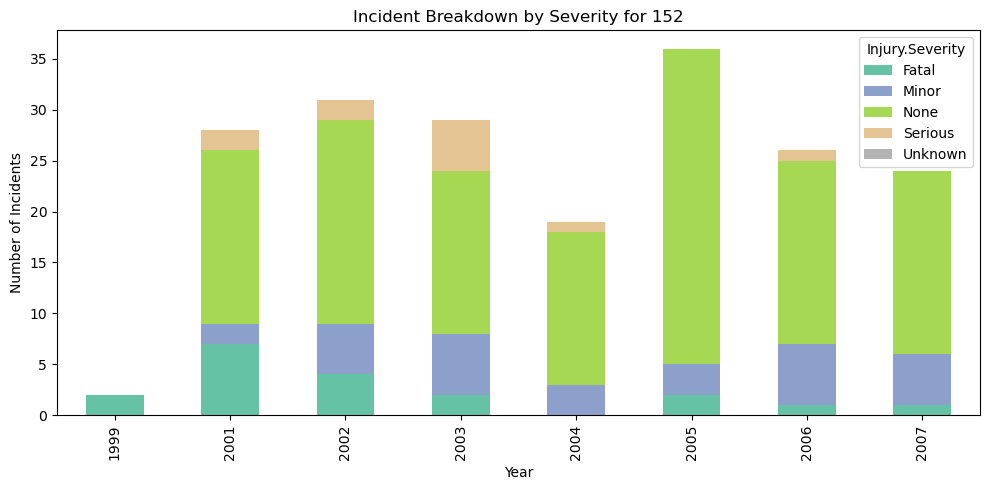

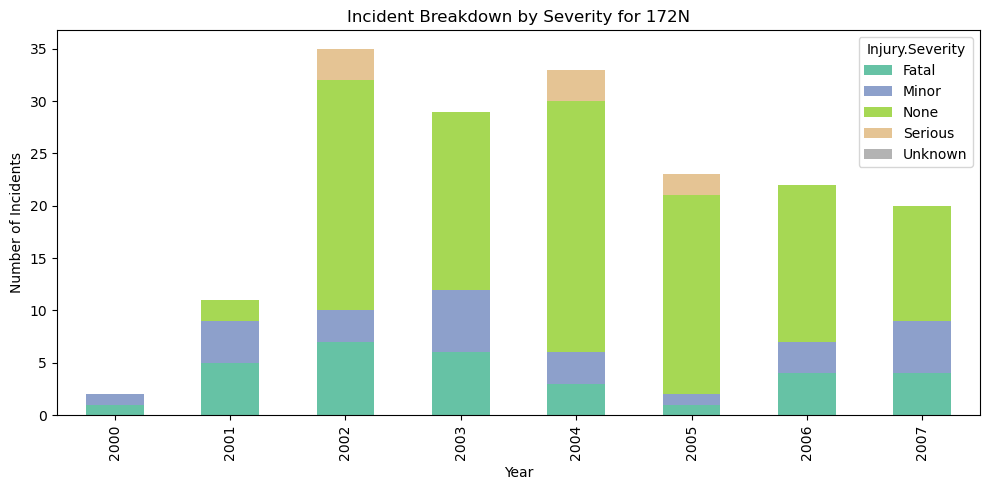

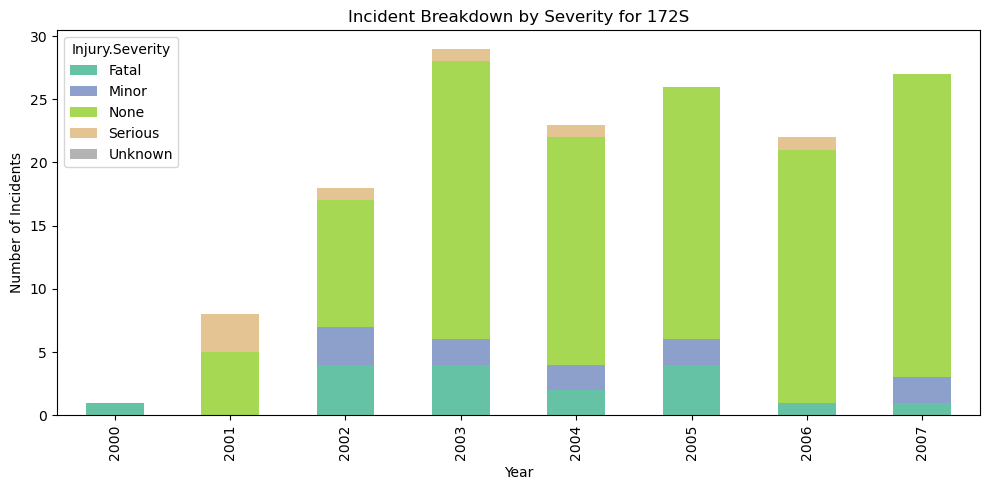

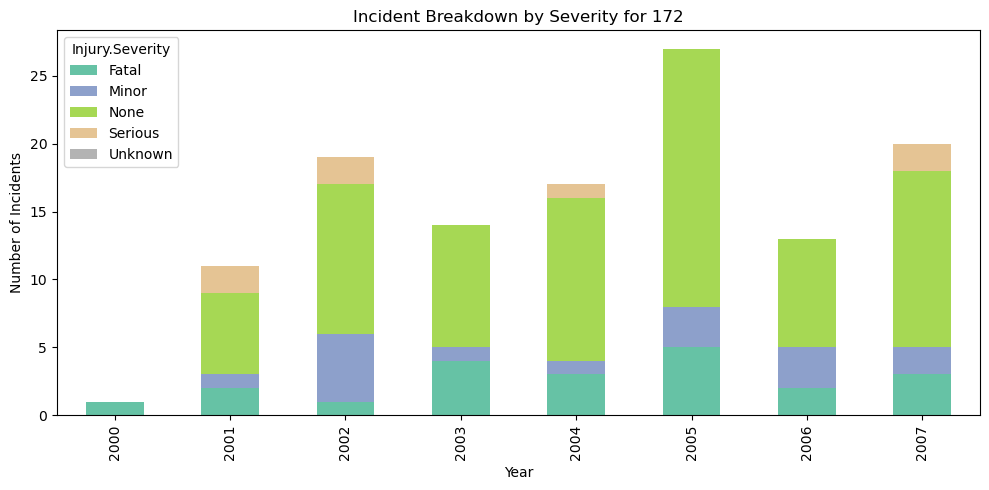

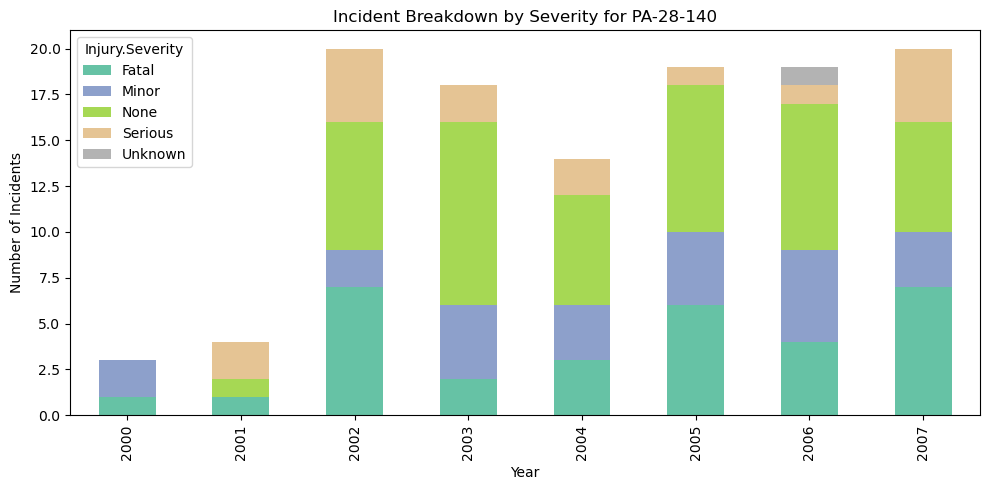

In [83]:
# Loop through the top 5 models and plot for each
for model_name in top_models:
    model_data = pivot_df[pivot_df['Model'] == model_name]
    
    # Plot a stacked bar chart
    model_data.plot(x='Event.Year', kind='bar', stacked=True, figsize=(10, 5), colormap='Set2')
    plt.title(f'Incident Breakdown by Severity for {model_name}')
    plt.ylabel('Number of Incidents')
    plt.xlabel('Year')
    plt.tight_layout()
    plt.show()


###### findings.
* The PA-28-140 Aircraft model has the highest constant incidents. It shows a high probability of danger, while the 172S model shows a  minimal probability of danger.
* For further model analysis, will conduct on tableau for more insights. 

##### 4. **Multivariate & Grouped Insights**
###### Compare incident frequencies by usage type (commercial vs private), age, or manufacturer.

*Changing the  aircraft  type from `Model` to   `Aircraft category`  for more simple and easy visualization creations.*

In [88]:
# retrieve the  columns to be used 
df['Aircraft.Category'].value_counts()

Aircraft.Category
Unknown Category    8334
Airplane            3084
Helicopter           390
Glider                88
Balloon               40
Gyrocraft             21
Ultralight             6
Blimp                  3
Powered-Lift           2
Name: count, dtype: int64

In [90]:
# can be used for andvanced analysis of this objective .
df['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                     7044
Instructional                1559
Unknown                      1188
Aerial Application            483
Business                      403
Positioning                   374
Other Work Use                241
Public Aircraft               149
Flight Test                   124
Aerial Observation             94
Executive/corporate            59
Ferry                          58
Air Race/show                  57
Skydiving                      31
Public Aircraft - Federal      26
Banner Tow                     23
External Load                  17
Public Aircraft - State        14
Glider Tow                     10
Public Aircraft - Local         9
Firefighting                    4
Air Drop                        1
Name: count, dtype: int64

In [92]:
df['FAR.Description'].value_counts()

FAR.Description
Unknown FAR Category              8330
Part 91: General Aviation         3244
Part 137: Agricultural             162
Part 135: Air Taxi & Commuter       85
Part 121: Air Carrier               44
Non-U.S., Non-Commercial            35
Non-U.S., Commercial                22
Public Use                          18
Unknown                              6
Part 129: Foreign                    5
Part 133: Rotorcraft Ext. Load       5
NUSN                                 5
091                                  3
Part 91 Subpart K: Fractional        1
Part 125: 20+ Pax,6000+ lbs          1
Public Aircraft                      1
NUSC                                 1
Name: count, dtype: int64

In [94]:
df['Make'].value_counts()

Make
Cessna                            3485
Piper                             1854
Beech                              751
Bell                               361
Robinson                           308
                                  ... 
Davenport (van's)                    1
Dantzer Lawrence L                   1
Aircraft Mfg & Development Co.       1
Murphy                               1
MAULE                                1
Name: count, Length: 1715, dtype: int64

In [96]:
# Calculate the  Aircraft age.
# limitation: there is no manufacturing Date or Certificate.Issued.Date
# For  temporary trends,  use the `Event.Year` to analyze usage . 

In [98]:
# use the df['FAR.Description'] to create a usage_type column
def classify_usage(far):
    if pd.isna(far):
        return 'Unknown'
    elif '121' in far or '135' in far:    
        return 'Commercial'
    elif '91' in far:
        return 'Private'
    else:
        return 'Other'

df['Usage.Type'] = df['FAR.Description'].apply(classify_usage)

In [100]:
# create  a pivot table to create  incidents by Aircraft Category and usage.
pivot_t1=df.pivot_table(index= 'Aircraft.Category',
                        columns= 'Usage.Type',
                        values= 'Event.Id',
                        aggfunc='count',
                        fill_value=0
) 
pivot_t1

Usage.Type,Commercial,Other,Private
Aircraft.Category,,,
Airplane,102,218,2764
Balloon,0,0,40
Blimp,0,0,3
Glider,0,1,87
Gyrocraft,0,0,21
Helicopter,27,42,321
Powered-Lift,0,0,2
Ultralight,0,0,6
Unknown Category,0,8330,4


In [102]:
# create a pivot table  to gain incidents  by Manufacturer and usage_type
pivot_t2=df.pivot_table(index='Make',
                         columns='Usage.Type',
                         values='Event.Id',             
                         aggfunc='count',
                         fill_value=0
).sort_values(by='Commercial', ascending=False)  # arranges  by descending order using the commercial col
pivot_t2

Usage.Type,Commercial,Other,Private
Make,,,
Cessna,28,2365,1092
Boeing,16,187,17
Beech,9,597,145
Bell,9,288,64
Mcdonnell Douglas,9,72,3
...,...,...,...
Fox Alfred C.,0,1,0
Found Aircraft Canada Inc,0,0,2
Found Aircraft Canada,0,1,0


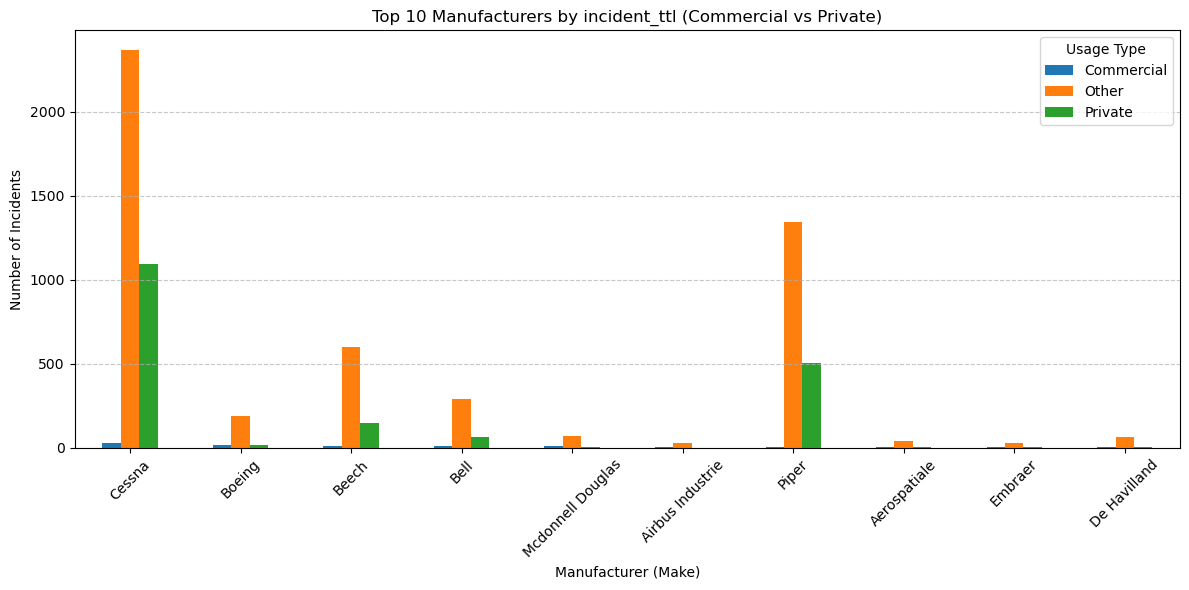

In [104]:
# plot the pivot_t2 to  check on the  top ten manufacturers for the  plane models.
Top_10=pivot_t2.head(10)
# plot a grouped bar chart 
Top_10.plot(kind='bar', figsize=(12, 6))

# Label the chart
plt.title('Top 10 Manufacturers by incident_ttl (Commercial vs Private)')
plt.ylabel('Number of Incidents')
plt.xlabel('Manufacturer (Make)')
plt.xticks(rotation=45)
plt.legend(title='Usage Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

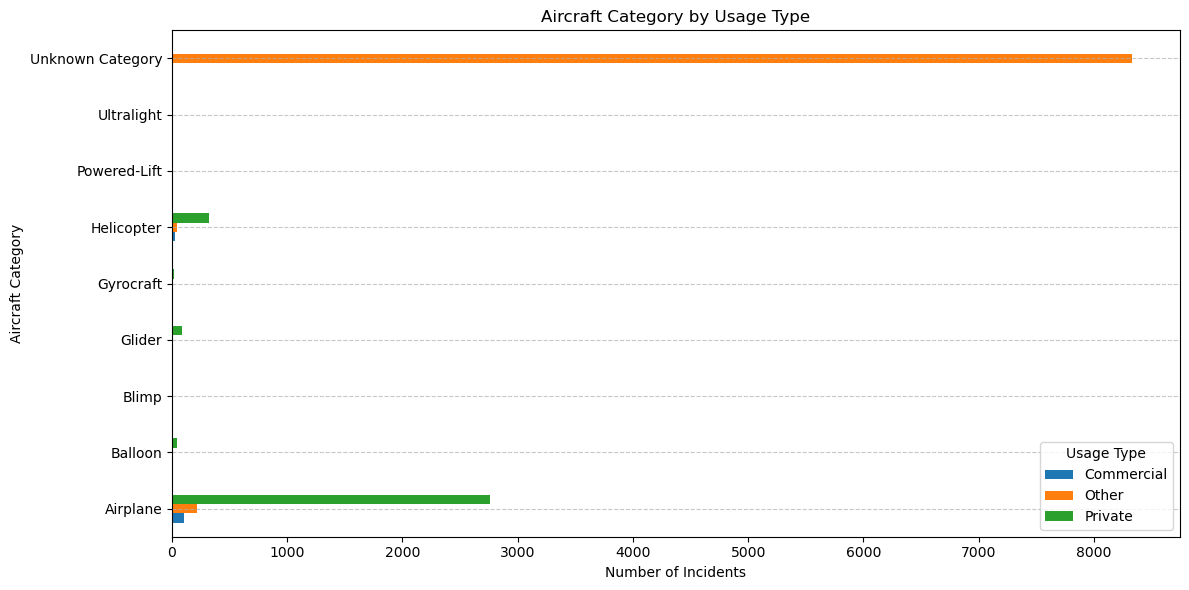

In [106]:
#  plot the pivot_t1 to  check on the  top Aircraft category  by usage type.
# plot a  grouped barh graph.
pivot_t1.plot(kind='barh', figsize=(12, 6))
# Label chart 
plt.title('Aircraft Category by Usage Type')
plt.xlabel('Number of Incidents')
plt.ylabel('Aircraft Category')
plt.legend(title='Usage Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

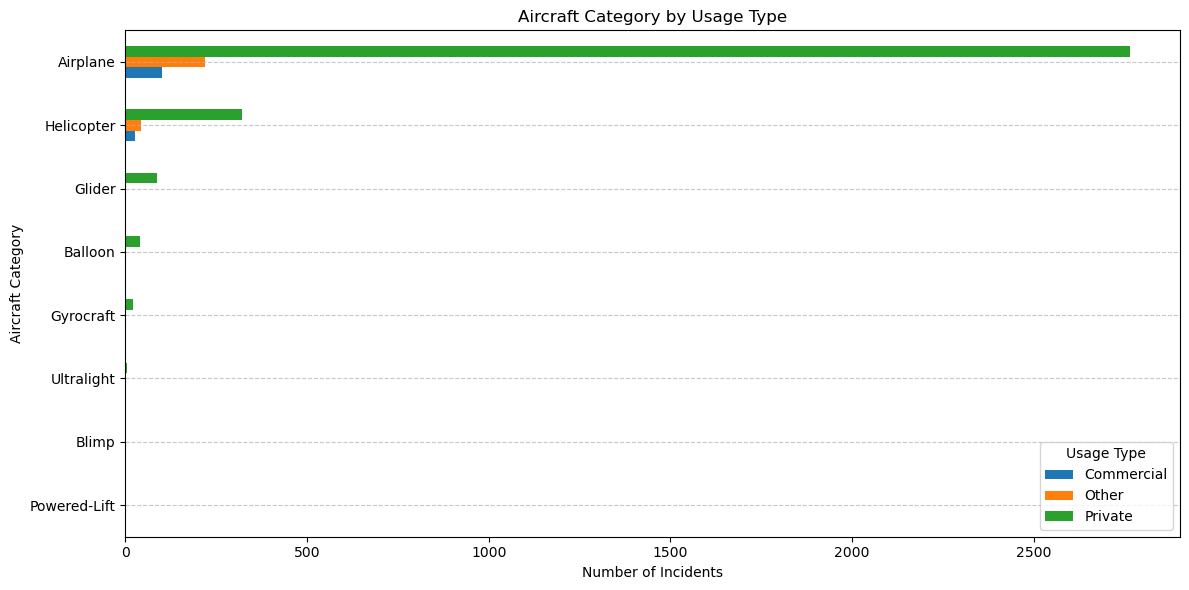

In [108]:
# improved graph
# rmove the Unknown cartegory and sort the values to ascending order 
pivot_filtered=pivot_t1.drop(index= 'Unknown Category', errors= 'ignore')
pivot = pivot_filtered.sort_values(by=pivot_filtered.columns.to_list(), ascending=True)
# plot the data.
pivot.plot(kind='barh', figsize=(12, 6))
# Label chart 
plt.title('Aircraft Category by Usage Type')
plt.xlabel('Number of Incidents')
plt.ylabel('Aircraft Category')
plt.legend(title='Usage Type', loc=4)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###### My Findings
* according to the visualizations, private aviation has more incidents than the commercial ones.
* The manufacturers(Make)  cessna and piper  have high incidents  do to their products esspecially on the private aircrafts

##### 5. **Incident Causes & Locations**
* Visualize the top causes of incidents and the regions with the highest incident density.

In [112]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'FAR.Description', 'Purpose.of.flight', 'Air.carrier',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date',
       'PubDate_Display', 'Event.Year', 'Usage.Type'],
      dtype='object')

In [114]:
# let's load the recommended columns
df['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Landing          3215
Takeoff          2195
Cruise           1775
Maneuvering      1475
Approach         1221
Unknown Phase     483
Taxi              377
Descent           343
Climb             339
Go-around         263
Standing          199
Unknown            65
Other              18
Name: count, dtype: int64

In [116]:
df['Injury.Severity'].value_counts()

Injury.Severity
None       6337
Fatal      2621
Minor      1716
Serious    1287
Unknown       7
Name: count, dtype: int64

In [118]:
# Group and reshape your clean data
phase_severity = df.groupby(['Broad.phase.of.flight', 'Injury.Severity']).size().unstack(fill_value=0)
phase_severity

Injury.Severity,Fatal,Minor,None,Serious,Unknown
Broad.phase.of.flight,,,,,
Approach,356,214,471,180,0
Climb,108,48,129,54,0
Cruise,534,302,735,204,0
Descent,92,63,139,49,0
Go-around,56,46,126,35,0
Landing,78,322,2650,165,0
Maneuvering,653,210,405,207,0
Other,3,3,8,4,0
Standing,21,28,128,22,0


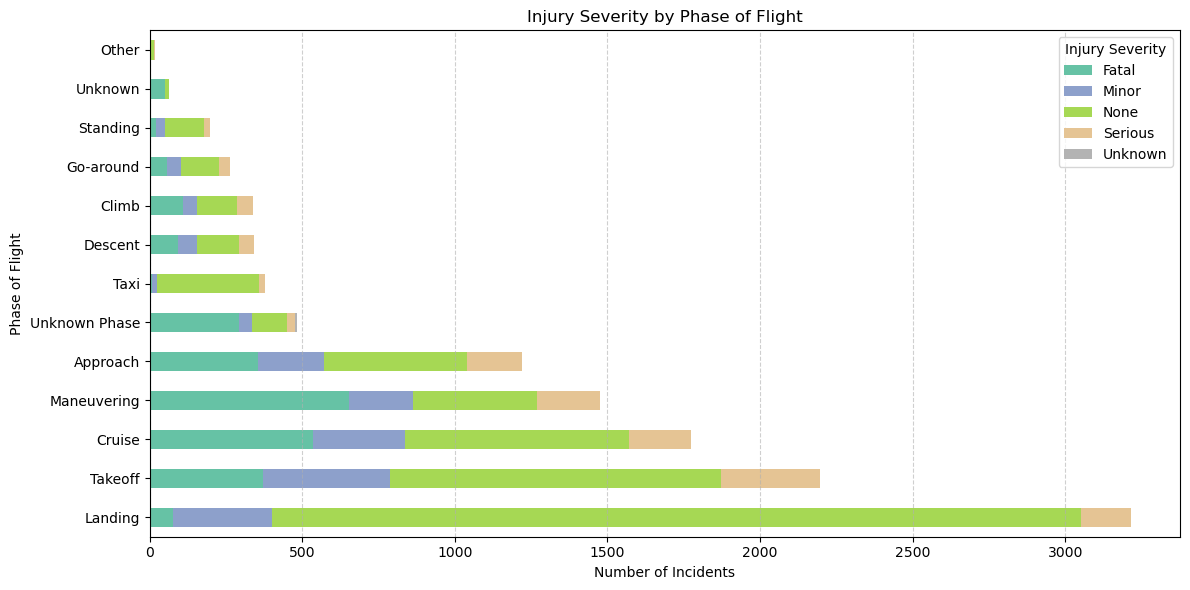

In [120]:
# Let's plot the two columns to plot a grouped bar
# Sort by total incident count descending
phase_severity = phase_severity.loc[phase_severity.sum(axis=1).sort_values(ascending=False).index]
# Plot
phase_severity.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='Set2')

# Labels and formatting
plt.title('Injury Severity by Phase of Flight')
plt.xlabel('Number of Incidents')
plt.ylabel('Phase of Flight')
plt.legend(title='Injury Severity')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


###### My Finding
* The phase of flight with high incidents is landing.

##### 5. **Insights and Recommendations**
* Other and Private usage types of aircraft have higher injury severity than   the commercial ones. This suggests that general aviation poses a higher volume of safety  incidents, possibly due to looser regulations, pilot experience, or maintenance variation.
  
* The Aircraft Category poses high incidents, most especially in private/personal aviation. However, the multi-engine aircraft categories, such as Gyrocraft, Powered-Lift, and Ultralight, have had slight incidents, but these aircraft can be suitable for starting  a business venture in aviation.

* While the landing phase accounts for the highest number of incidents, most result in non-injury outcomes. In contrast, the maneuvering, takeoff, and cruise phases—though less frequent—are associated with high injury severity. This suggests a need to shift to  a safety focus on in-flight operations, where risk per incident may be higher.

##### 6. **Challenges and conclusions**
* The data had a lot of critical missing values.

In [125]:
# lets change the data back to csv for Tableau analysis.
df.to_csv('Aviation_clean_data.csv', index=False)